# МатСтат. Практика 4. Линейная регрессия

В папке 3 файла с данными.  
1-ый файл содержит 2 ряда данных. Необходимо построить линейную регрессию между ними (1-ый стоблец содержит факторную переменную, 2-ой результирующую), оценить значимость полученных коэффициентов прямой и построить доверительные интервалы для них, оценить адекватность модели.

2-ой файл содержит 4 ряда данных. Первый ряд (столбец) содержит количественную факторную переменную, следующие два - качественную факторную переменную, последний - результирующую переменную.
Необходимо с помощью теста Чоу обосновать необходимость деления выборки по одной из качественных факторных переменных. Произвести разбиение и построить две линейных регрессии.

3-ий файл содержит 2 ряда данных. Необходимо двумя способами (тест Спирмена и тест Гольдфельда-Квандта) определить, 
присутствует ли в данных гетероскедастичность, построить линейную регрессию, оценить значимость полученных коэффициентов и адекватность модели.

Все расчеты проводить для уровня значимости (альфа) = 0.05.

## Файл 1
Задача: построить линейную регрессию между двумя рядами данных,  
оценить значимость полученных коэффициентов прямой,  
построить доверительные интервалы для них, оценить адекватность модели.
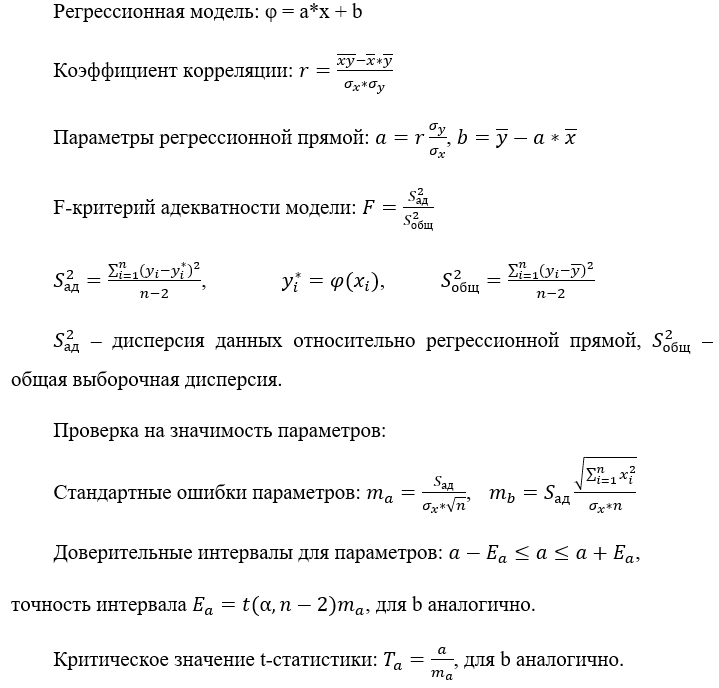

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('1.txt', header=None, names=['X', 'Y'])

In [3]:
data.head(3)

,X,Y
0,5.00000,-11.667240
1,5.20202,-13.397662
2,5.40404,-19.211289


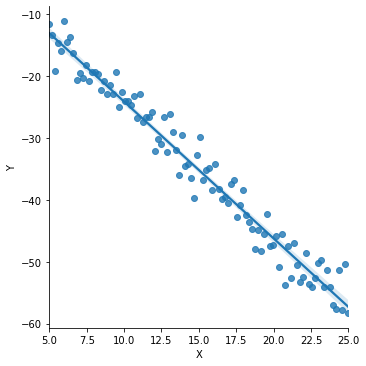

In [4]:
sns.lmplot(x='X', y='Y', data=data);

In [5]:
def lin_regression(data):
    x_mean = np.mean(data.X)
    y_mean = np.mean(data.Y)
    xy_mean = np.mean(data.X * data.Y)
    x_std = np.std(data.X)
    y_std = np.std(data.Y)
    
    r = (xy_mean - x_mean * y_mean) / (x_std * y_std)
    a = r * y_std / x_std
    b = y_mean - a * x_mean
    
    return r, a, b

In [6]:
def test_adekv(data, a, b):
    y_mean = np.mean(data.Y)
    
    y_phi = a * data.X + b
    n = data.shape[0]
    f1 = n - 2
    f2 = n - 1

    S2_ad = np.sum((data.Y - y_phi) ** 2) / f1
    S2_ob = np.sum((data.Y - y_mean) ** 2) / f2
    
    F = S2_ad / S2_ob
    print('F расч = ', F)
    
    return S2_ad

In [7]:
def znachimost(a, b, S2_ad, data):
    n = data.shape[0]
    x_std = np.std(data.X)
    
    # стандартные ошибки параметров
    m_a = np.sqrt(S2_ad) / (x_std * np.sqrt(n))
    m_b = np.sqrt(S2_ad) * np.sqrt(np.sum(data.X ** 2)) / (n * x_std)

    # точность интервальных оценок
    E_a = 1.98 * m_a
    E_b = 1.98 * m_b

    print(f'{np.round(a - E_a, 5)} <= a <= {np.round(a + E_a, 5)}')
    print(f'{np.round(b - E_b, 5)} <= b <= {np.round(b + E_b, 5)}')
    print('\nT_a = ', a / m_a)
    print('T_b = ', b / m_b)

In [8]:
r, a, b = lin_regression(data)
print('r = ', r)
print('a = ', a, '\nb = ', b)

r =  -0.9823325791481842
a =  -2.2111775634457285 
b =  -2.0159518941729075


Коэффициент корреляции r [-1; 1]

Параметры прямой y* = a*x + b

S2 ад - дисперсия относительно регрессионной прямой  
S2 общ - дисперсия данных

In [9]:
S2_ad = test_adekv(data, a, b)

F расч =  0.03538007847411806


F крит = 1.392    
F расч < F крит  →  
Модель **адекватна** с заданной степенью надежности $\alpha = 0.05$

In [10]:
znachimost(a, b, S2_ad, data)

-2.29543 <= a <= -2.12692
-3.37191 <= b <= -0.65999

T_a =  -51.96330303132319
T_b =  -2.943728596608823


табличное = 1.98  
|T_a| > Tтабл и |T_b| > Tтабл →  
Параметры **статистически значимы**

## Файл 2
Задача: с помощью теста Чоу обосновать необходимость  
деления выборки по одной из качественных факторных переменных.  
Произвести разбиение и построить две линейных регрессии.
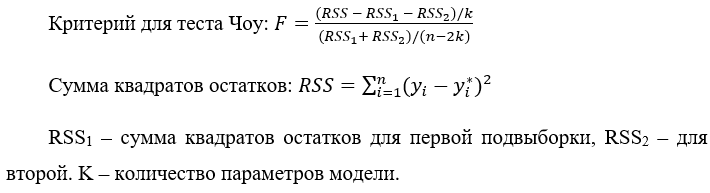

In [11]:
def get_RSS(data, a, b):
    y_phi = a * data.X + b
    RSS = np.sum((data.Y - y_phi) ** 2)
    return RSS

In [12]:
def test_Chow(data, data1, data2):
    n = data.shape[0]
    k = 2 # количество параметров модели (a и b)
    
    r, a, b = lin_regression(data)
    RSS = get_RSS(data, a, b)
    
    r, a, b = lin_regression(data1)
    RSS1 = get_RSS(data1, a, b)
    
    r, a, b = lin_regression(data2)
    RSS2 = get_RSS(data2, a, b)
    
    F = ((RSS - RSS1 - RSS2) / k) / ((RSS1 + RSS2) / (n - 2*k))
    
    print('F = ', F)

In [13]:
data2 = pd.read_csv('2.txt', header=None, names=['X', 'f_1', 'f_2', 'Y'])

In [14]:
data2.head(3)

,X,f_1,f_2,Y
0,12.676768,0.0,1.0,-20.408190
1,23.383838,1.0,1.0,-59.562669
2,19.545455,1.0,0.0,-47.399669


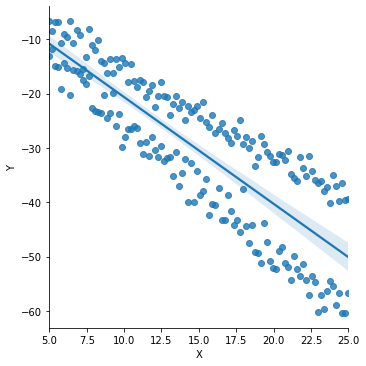

In [15]:
sns.lmplot(x='X', y='Y', data=data2);

In [16]:
r, a, b = lin_regression(data2)
print('r = ', r)
print('a = ', a, '\nb = ', b)

r =  -0.8380958776134972
a =  -1.9633531200722636 
b =  -1.029982359531079


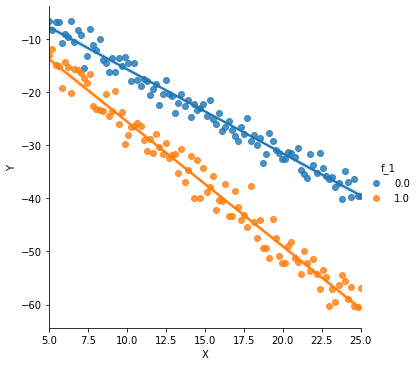

In [17]:
sns.lmplot(x='X', y='Y', data=data2, hue='f_1');

Для разбиения по f1:

In [18]:
data2_f1_0 = data2.query('f_1 == 0')
data2_f1_1 = data2.query('f_1 == 1')
test_Chow(data2, data2_f1_0, data2_f1_1)

F =  1270.082412964753


F крит = 3.087  
F > F крит → выборки **не однородны**

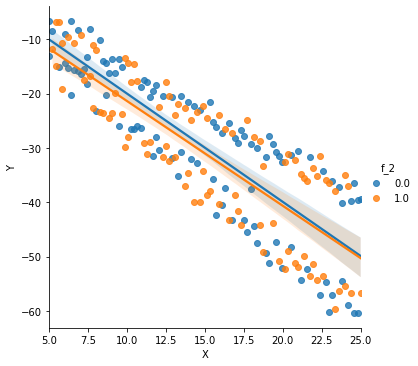

In [19]:
sns.lmplot(x='X', y='Y', data=data2, hue='f_2');

Для разбиения по f2:

In [20]:
data2_f2_0 = data2.query('f_2 == 0')
data2_f2_1 = data2.query('f_2 == 1')
test_Chow(data2, data2_f2_0, data2_f2_1)

F =  0.5434870403700822


F крит = 3.087  
F < F крит → выборки **однородны**

## Файл 3
Задача: двумя способами (тест Спирмена и тест Гольдфельда-Квандта)  
определить, присутствует ли в данных гетероскедастичность, построить линейную регрессию,  
оценить значимость полученных коэффициентов и адекватность модели.

In [21]:
def test_Spearman(data, a, b):
    n = data.shape[0]
    y_phi = a * data.X + b
    
    eps = np.abs(data.Y - y_phi)
    eps_rank = eps.rank()
    x_rank = data.X.rank()
    
    r_x_eps = 1 - 6 * np.sum((eps_rank - x_rank)**2) / (n * (n**2 - 1))
    t_x_eps = r_x_eps * np.sqrt(n - 2) / np.sqrt(1 - r_x_eps**2)
    
    print('t_x_eps = ', t_x_eps)

In [22]:
def test_G_K(data):
    n = data.shape[0]
    n_shtr = int(np.round(3/8 * n))
    
    data = data.sort_values(by='X')
    data1 = data[:n_shtr]
    data2 = data[(n - n_shtr):]
    
    r, a, b = lin_regression(data1)
    RSS1 = get_RSS(data1, a, b)
    r, a, b = lin_regression(data2)
    RSS2 = get_RSS(data2, a, b)
    
    F = (RSS1 / (n_shtr - 1)) / (RSS2 / (n_shtr - 1))
    print('F = ', F)

In [23]:
data3 = pd.read_csv('3.txt', header=None, names=['X', 'Y'])

In [24]:
data3.head(3)

,X,Y
0,5.00000,8.055293
1,5.20202,-7.271106
2,5.40404,-25.017791


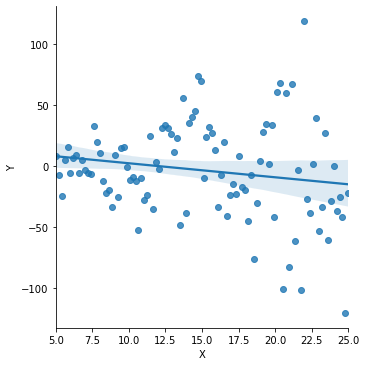

In [25]:
sns.lmplot(x='X', y='Y', data=data3);

In [26]:
r, a, b = lin_regression(data3)
print('r = ', r)
print('a = ', a, '\nb = ', b)

r =  -0.17143600447349322
a =  -1.148523225936878 
b =  13.659762500498982


In [27]:
S2_ad = test_adekv(data3, a, b)

F расч =  0.98051387694537


F крит = 1.392   
F расч < F крит  →  
Модель **адекватна** с заданной степенью надежности $\alpha = 0.05$

In [28]:
znachimost(a, b, S2_ad, data)

-2.46864 <= a <= 0.17159
-7.58578 <= b <= 34.9053

T_a =  -1.722632995308075
T_b =  1.2730357501556748


табличное = 1.98  
|T_a| < Tтабл и |T_b| < Tтабл, поэтому параметры статистически **не значимы.**

In [29]:
test_Spearman(data3, a, b)

t_x_eps =  4.448408760481239


t табл = 1.98  
t_x_eps > t табл → есть **линейная корреляция** между остатками и X

In [30]:
test_G_K(data3)

F =  0.14823925124497367


F крит = 1.693  
F < F крит → дисперсии **равны**

По тесту Спирмена есть **гетероскедатичность** остатков, по тесту Гольдфельда-Квандта нет.

### Выводы
- Файл 1: регрессионная модель адекватна, оба параметра статистически значимы, для них рассчитаны доверительные интервалы.
- Файл 2: с помощью теста Чоу обоснована необходимость деления выборки по первой качественной факторной переменной.
- Файл 3: по тесту Спирмена есть гетероскедатичность остатков, по тесту Гольдфельда-Квандта нет, модель адекватна, параметры статистически не значимы.
